# Homework 10 - Spline Regression

In this homework, you will implement a general spline regression.
Recall that a spline of degree $d$ is a piecewise polynomial of degree $d$ with continuity of derivatives of orders $0, 1, \ldots, d-1$.

In the case of a cubic spline ($d = 3$) with $K$ knots, this regression function can be expressed by

$$ f(x_i) = \beta_0 + \beta_1 \, b_1(x_i) + \ldots + \beta_{K+3} \, b_1(x_i) $$

using appropriate basis functions.

From Slide 352, you know that we can start off with monomials $x, x^2, x^3$ and then add for each knot $\xi$ one **truncated monomial**

$$ h(x,\xi) = (x-\xi)_+^3 = \begin{cases} (x - \xi)^3 & \text{if } x > \xi, \\ 0 & \text{otherwise.} \end{cases} $$


A one-dimensional example is provided below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def y_func(x):
    return np.sin(8*x) / np.exp((5*x))
n = 100
eps = 0.1
np.random.seed(1)

x = np.random.rand(n)
y = y_func(x) + eps * np.random.randn(n)
plt.scatter(x, y, label='Samples')
xlin = np.linspace(0,1,100)
plt.plot(xlin, y_func(xlin),'r--', label='Population line')
plt.legend()

**Task**: Write a function that implements spline regression of degree $d$ and try to estimate the function `y_func` using **cubic** spline regression with $K$ equidistant knots (use $K=4$ in your tests).

**Solution**:

In [3]:
def generateSplineRegressionMatrix(x, xi, d = 3):

    # Get number of samples
    n = len(x)
    
    # Get number of knots
    K = len(xi)
    
    # Initialize matrix with predictor variables 1
    X = np.ones((n,1))

    # Append columns for the monomials x^1, ..., x^d
    for i in range(d):
        X = np.hstack((X,np.power(x,i+1).reshape(n,1)))
        
    # Append one column for each knot using the 
    # truncated monomial (x - xi_k)_+^d
    for k in range(K):
        h = np.power(np.maximum(x-xi[k],0), d)
        X = np.hstack((X,h.reshape(n,1)))
    return X

In [4]:
K = 4
xi = np.linspace(0,1,K+2)
xi = xi[1:-1]
print(xi)

[0.2 0.4 0.6 0.8]


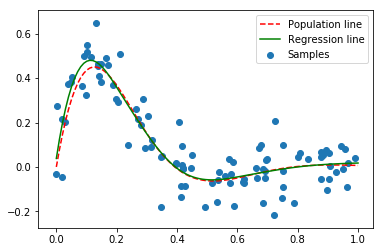

In [10]:
d = 3
X = generateSplineRegressionMatrix(x, xi, d)
beta = np.linalg.solve(X.T @ X, X.T @ y)
plt.scatter(x, y, label = 'Samples')
Xspline = generateSplineRegressionMatrix(xlin, xi, d)
plt.plot(xlin, y_func(xlin), 'r--', label='Population line')
plt.plot(xlin, Xspline @ beta, 'g-', label='Regression line')
plt.legend();

**Hint**: If you have no idea how to get started, the following code cells might help you.
They perform a **global cubic regression** and can be adapted to perform a **cubic spline regression**.

In [6]:
def generatePolynomialRegressionMatrix(x, d = 3):
    
    # Get number of samples
    n = len(x)
    
    # Initialize matrix with predictor variables 1 (for the intercept)
    X = np.ones((n,1))

    # Append columns for the monomials x^1, ..., x^d
    for i in range(d):
        X = np.hstack((X,np.power(x,i+1).reshape(n,1)))
    
    return X

In [7]:
# Set degree of spline regression
d = 3

# Generate Spline matrix
X = generatePolynomialRegressionMatrix(x, d)

# Solve the normal equation, remember the @ sign
# performs the ordinary matrix multiplication for numpy arrays.
# You should also avoid to invert the matrix X^T * X!

beta = np.linalg.solve(X.T @ X, X.T @ y)

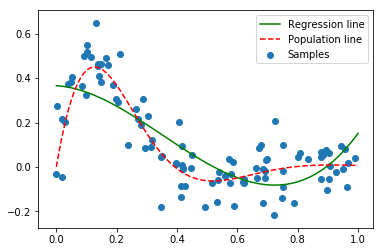

In [8]:
plt.scatter(x, y, label='Samples')

Xreg = generatePolynomialRegressionMatrix(xlin,d)

plt.plot(xlin, Xreg @ beta, 'g-', label = 'Regression line')
plt.plot(xlin, y_func(xlin), 'r--', label='Population line')
plt.legend()

In [11]:
beta

array([ 3.82794677e-02,  8.94074990e+00, -5.46596826e+01,  8.98472825e+01,
       -7.81583544e+01, -2.18941451e+01,  9.11085904e+00,  1.75846110e+00])